<a href="https://colab.research.google.com/github/Joakosalazar/Untitled6.ipynb/blob/main/DeepLearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Presentación 2

En base a los conocimiento adquiridos, en esta segunda presentación utilizamos el mismo modelo de la primera presentación que consta en un clasificador de imágenes en base a su fotografía con una salida de 10 neuronas donde cada neurona será asignada con los siguientes ítems: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

En primer lugar, tomamos una imagen y lo convertimos en blanco y negro para asignar un valor numérico a cada pixel el numero 0 seria para totalmente negro y 255 para totalmente blanco.

En segundo lugar, obtenemos una imagen de 100px de ancho y 100px de altura lo cual tendremos un región de 10 000 pixeles, lo reducimos esta imagen de 28px de ancho y 28 px de altura que al final obtendremos una imagen con un región de 784 pixeles

En tercer lugar, probaremos con distintas capas de red convolucional con diferentes tipos de activacion y 10 neuronas de salida






### Herramientas que se utiliza y carga de información

**TensorFlow** es una biblioteca de software de código abierto desarrollada por Google que se utiliza para implementar y desplegar modelos de aprendizaje automático y de aprendizaje profundo

**En nuestro trabajo utilizamos TensorFlow Datasets (TFDS)** es una librería de TensorFlow que proporciona un conjunto de herramientas para acceder y manipular conjuntos de datos de forma sencilla. Está diseñada para facilitar la carga, el preprocesamiento y la gestión de datos para tareas de aprendizaje automático y de investigación.

**Carga de información** lo realizamos a traves de tfds dividiendo los datos_entrenamiento y datos_pruebas, además las categorías que posee el dataset



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

nombres_clases = metadatos.features['label'].names

nombres_clases


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Preparación del dataset

En este caso, tf.cast(imagenes, tf.float32) se utilizaría para convertir el tensor imagenes a tipo de datos float32. Esta conversión puede ser necesaria en algunos casos, por ejemplo, al preprocesar datos para entrenar modelos de aprendizaje automático, donde es común trabajar con datos en punto flotante.
En la función normalizar, se convierten las imágenes a tipo tf.float32 y luego se dividen por 255 para escalar los valores de los píxeles de cada imagen al rango [0, 1], lo que es una forma común de normalización para imágenes en escala de grises o RGB. Después de la normalización, las imágenes y las etiquetas se devuelven como una tupla (imagenes, etiquetas)
Al usar cache(), TensorFlow almacenará en memoria caché los elementos del conjunto de datos después de que se lean por primera vez. Esto significa que, en las iteraciones posteriores durante el entrenamiento, los datos se recuperarán rápidamente de la memoria caché en lugar de volver a leerlos del almacenamiento, lo que puede acelerar significativamente el proceso de entrenamiento.


In [ ]:
#Normalizar los datos (Pasar de 0-255 a 0-1)

def normalizar(imagenes, etiquetas):
    imagenes=tf.cast(imagenes, tf.float32)
    imagenes /= 255#Aqui lo pasa de 0-255 a 0-1
    return imagenes, etiquetas

#normalizar los datos de entrenamiento y pruebas con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()


Entiendo que estás accediendo al primer elemento del conjunto de datos de entrenamiento (datos_entrenamiento) utilizando take(1). Luego, estás iterando sobre este primer elemento para obtener la imagen y la etiqueta correspondiente.

Después de obtener la imagen, parece que estás convirtiéndola a un array de NumPy y luego remodelándola a una forma de 28x28 píxeles. Esto es común cuando trabajas con imágenes en TensorFlow y quieres visualizarlas o realizar operaciones específicas en formato de matriz.

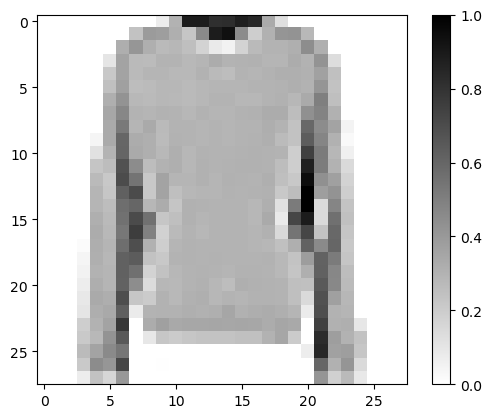

In [ ]:
#mostrar una imagen de los datos de pruebas, de momento mostramos la primera
for imagen, etiqueta in datos_entrenamiento.take(1):
    break
imagen = imagen.numpy().reshape((28,28)) #Redimensionar, cosas de tensores, lo veremos despues

import matplotlib.pyplot as plt

#dibujar dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

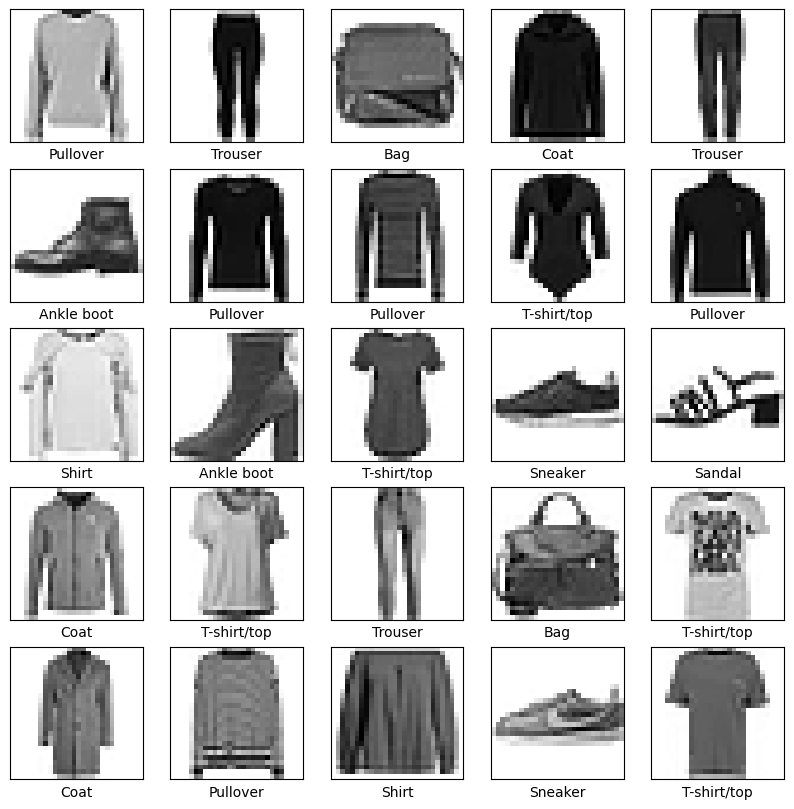

In [ ]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

En esta segunda parte, utilizaremos un modelo de red neuronal convolucional (CNN) en TensorFlow empleando la API de alto nivel tf.keras. Este modelo consta de varias capas convolucionales seguidas de capas de agrupación (pooling), seguidas de capas completamente conectadas (Dense) para la clasificación.

Aquí describimos la estructura del modelo que hemos definido:

**-** Una capa Conv2D con 32 filtros de tamaño (3,3), función de activación ReLU y forma de entrada (28, 28, 1), que corresponde a imágenes de 28x28 píxeles en escala de grises (1 canal).

**-** Una capa de agrupación (MaxPooling2D) que reduce la resolución espacial de la salida de la primera capa convolucional.
Otra capa Conv2D con 64 filtros de tamaño (3,3) y función de activación ReLU.

**-** Otra capa de agrupación (MaxPooling2D) para reducir la resolución espacial nuevamente.

**-** Una tercera capa Conv2D con 64 filtros de tamaño (3,3) y función de activación ReLU.

**-** Una capa Flatten para aplanar la salida de la última capa convolucional antes de pasar a las capas completamente conectadas.

**-** Dos capas Dense con activación ReLU, la primera con 64 unidades y la segunda con 10 unidades y activación softmax, que es la capa de salida para clasificar las imágenes en 10 clases (asumiendo que estás trabajando con un problema de clasificación de 10 clases, como MNIST).

In [ ]:
# Definición del modelo
modelrelu = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
modelrelu.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
modelrelu.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)


In [ ]:
import math

#entrenar
historialrelu = modelrelu.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5



1875/1875 [==============================] - 35s 14ms/step - loss: 0.4915 - accuracy: 0.8200
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3143 - accuracy: 0.8866
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2704 - accuracy: 0.8996
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2372 - accuracy: 0.9120
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2149 - accuracy: 0.9210


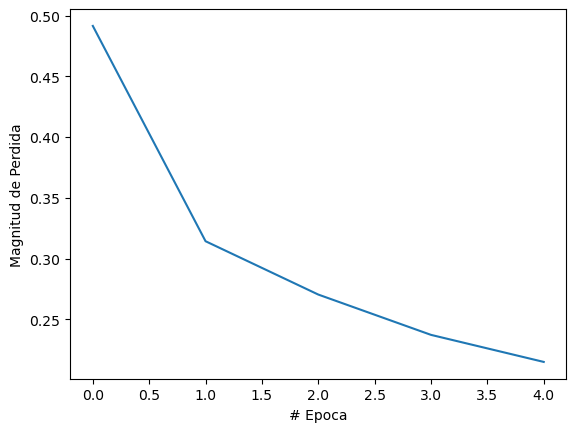

In [ ]:
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de Perdida')
plt.plot(historialrelu.history["loss"])

In [ ]:
# el modelo está mejorando su precisión a medida que pasa por más épocas de entrenamiento.

1/1 [==============================] - 1s 616ms/step


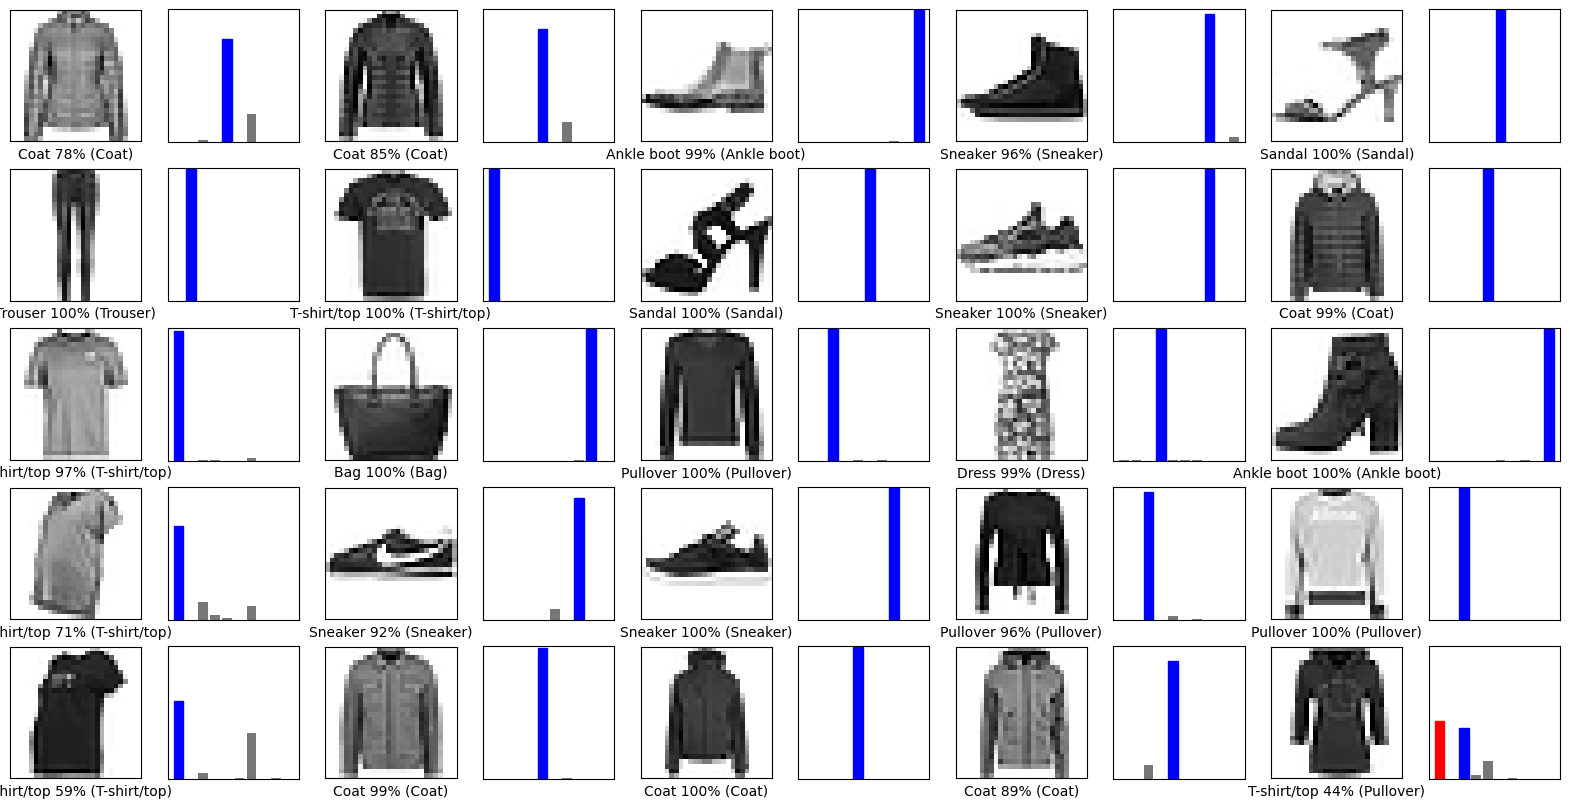

In [ ]:
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelrelu.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    etiqueta_prediccion = np.argmax(arr_predicciones)
    if etiqueta_prediccion == etiqueta_real:
        color ='blue' #si le atino
    else:
        color='red' #opps, no le atino

    plt.xlabel("{} {:2.0f}% ({})".format(
        nombres_clases[etiqueta_prediccion],
        100*np.max(arr_predicciones),
        nombres_clases[etiqueta_real],
        color=color
    ))

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0,1])
    etiqueta_prediccion = np.argmax(arr_predicciones)

    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2*columnas, 2*i+2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [ ]:
#tomar cualquier indice del dataset de pruebas para ver su prediccion
imagen = imagenes_prueba[0]
imagen = np.array([imagen])
prediccionrelu = modelrelu.predict(imagen)

print("Prediccion: " + nombres_clases[np.argmax(prediccionrelu[0])])

1/1 [==============================] - 0s 329ms/step
Prediccion: Coat


## Presentación 2 Modelo 2

Este código define un modelo de red neuronal convolucional (CNN) utilizando la API funcional de Keras en TensorFlow y usamos el función de activación tanh. Aquí tienes una explicación de cada capa del modelo:

**-** layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)): Esta es una capa de convolución 2D con 32 filtros de tamaño 3x3. La función de activación utilizada es la tangente hiperbólica ('tanh'). La forma de entrada de esta capa es de 28x28 píxeles en escala de grises (1 canal).

**-** layers.MaxPooling2D((2, 2)): Después de cada capa de convolución, se sigue una capa de agrupación máxima para reducir el tamaño espacial de la representación y, por lo tanto, el número de parámetros en el modelo.

**-** layers.Conv2D(64, (3, 3), activation='tanh'): Una segunda capa de convolución 2D con 64 filtros de tamaño 3x3 y activación 'tanh'.

**-** layers.MaxPooling2D((2, 2)): Otra capa de agrupación máxima.

**-** layers.Conv2D(64, (3, 3), activation='tanh'): Una tercera capa de convolución 2D con 64 filtros de tamaño 3x3 y activación 'tanh'.

**-** layers.Flatten(): Esta capa aplana la salida de la capa convolucional anterior para alimentarla a una capa densa.

**-** layers.Dense(64, activation='tanh'): Una capa densa con 64 unidades y activación 'tanh'.

**-** layers.Dense(10, activation='softmax'): La capa de salida con 10 unidades (una para cada clase en un problema de clasificación) y activación 'softmax', que produce una distribución de probabilidad sobre las clases.
En resumen, este modelo consiste en varias capas convolucionales seguidas de capas de agrupación máxima, seguidas de capas densas para la clasificación final. La activación 'tanh' se utiliza en las capas convolucionales y densas para introducir no linealidades en el modelo. La activación 'softmax' en la capa de salida produce probabilidades sobre las clases.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Cargar el conjunto de datos MNIST
datos_mnist = tf.keras.datasets.fashion_mnist
(x_entrenamiento, y_entrenamiento), (x_prueba, y_prueba) = datos_mnist.load_data()

# Normalizar los datos y remodelarlos para que tengan la forma adecuada para las convoluciones
x_entrenamiento = x_entrenamiento.reshape((x_entrenamiento.shape[0], 28, 28, 1)).astype('float32') / 255
x_prueba = x_prueba.reshape((x_prueba.shape[0], 28, 28, 1)).astype('float32') / 255

# Definir el modelo de red neuronal convolucional (CNN)
modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.Flatten(),
    layers.Dense(64, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

Este es un resumen detallado de cada capa en tu modelo y la forma de salida de cada una, junto con el número de parámetros que se están entrenando en cada capa:

**Capa Conv2D (conv2d_36):**
Tamaño de salida: (None, 26, 26, 32)
Parámetros entrenables: 320
Explicación: Esta capa convolucional tiene 32 filtros de tamaño 3x3. La imagen de entrada se convoluciona con estos filtros, lo que resulta en 32 mapas de características de salida. La dimensión espacial de la salida se reduce ligeramente debido al borde.

**Capa MaxPooling2D (max_pooling2d_24):**
Tamaño de salida: (None, 13, 13, 32)
Parámetros entrenables: 0
Explicación: Esta capa realiza una operación de agrupación máxima con un tamaño de ventana de 2x2, lo que reduce a la mitad tanto el ancho como el alto de cada mapa de características, manteniendo el número de canales.

**Capa Conv2D (conv2d_37):**
Tamaño de salida: (None, 11, 11, 64)
Parámetros entrenables: 18,496
Explicación: Otra capa convolucional con 64 filtros de tamaño 3x3. La salida de la capa anterior se convoluciona nuevamente, produciendo 64 mapas de características de salida.

**Capa MaxPooling2D (max_pooling2d_25):**
Tamaño de salida: (None, 5, 5, 64)
Parámetros entrenables: 0
Explicación: Otra capa de agrupación máxima que reduce la dimensión espacial de la salida a la mitad nuevamente.

**Capa Conv2D (conv2d_38):**
Tamaño de salida: (None, 3, 3, 64)
Parámetros entrenables: 36,928
Explicación: Una tercera capa convolucional con 64 filtros de tamaño 3x3.

**Capa Flatten (flatten_12):**
Tamaño de salida: (None, 576)
Parámetros entrenables: 0
Explicación: Esta capa aplana la salida de la última capa convolucional para alimentarla a una capa densa.

**Capa Dense (dense_24):**
Tamaño de salida: (None, 64)
Parámetros entrenables: 36,928
Explicación: Una capa densa con 64 neuronas y función de activación tangente hiperbólica ('tanh').

**Capa Dense (dense_25):**
Tamaño de salida: (None, 10)
Parámetros entrenables: 650
Explicación: Capa de salida con 10 neuronas, una para cada clase en el problema de clasificación, y función de activación softmax para producir probabilidades.

In [ ]:
# Compilar el modelo
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


In [ ]:
# Entrenar el modelo
historial_entrenamiento = modelo.fit(x_entrenamiento, y_entrenamiento, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 24s 26ms/step - loss: 0.5244 - accuracy: 0.8080 - val_loss: 0.3864 - val_accuracy: 0.8596
Epoch 2/5
750/750 [==============================] - 19s 25ms/step - loss: 0.3508 - accuracy: 0.8723 - val_loss: 0.3436 - val_accuracy: 0.8748
Epoch 3/5
750/750 [==============================] - 19s 25ms/step - loss: 0.3037 - accuracy: 0.8895 - val_loss: 0.3428 - val_accuracy: 0.8744
Epoch 4/5
750/750 [==============================] - 19s 25ms/step - loss: 0.2713 - accuracy: 0.9011 - val_loss: 0.2891 - val_accuracy: 0.8946
Epoch 5/5
750/750 [==============================] - 19s 25ms/step - loss: 0.2488 - accuracy: 0.9079 - val_loss: 0.2839 - val_accuracy: 0.8988


Esta visualización proporciona información sobre cómo la pérdida del modelo cambia a lo largo del proceso de entrenamiento. Idealmente, esperarías ver que tanto la pérdida de entrenamiento como la pérdida de validación disminuyan a medida que avanza el entrenamiento, lo que indica que el modelo está aprendiendo correctamente. Sin embargo, si la pérdida de validación comienza a aumentar mientras que la pérdida de entrenamiento sigue disminuyendo, podría indicar sobreajuste.

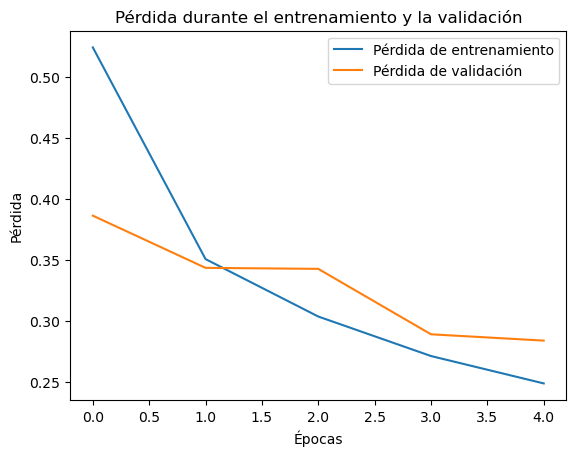

In [ ]:
import matplotlib.pyplot as plt

# Visualizar la pérdida durante el entrenamiento y la validación
plt.plot(historial_entrenamiento.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial_entrenamiento.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

313/313 [==============================] - 3s 8ms/step


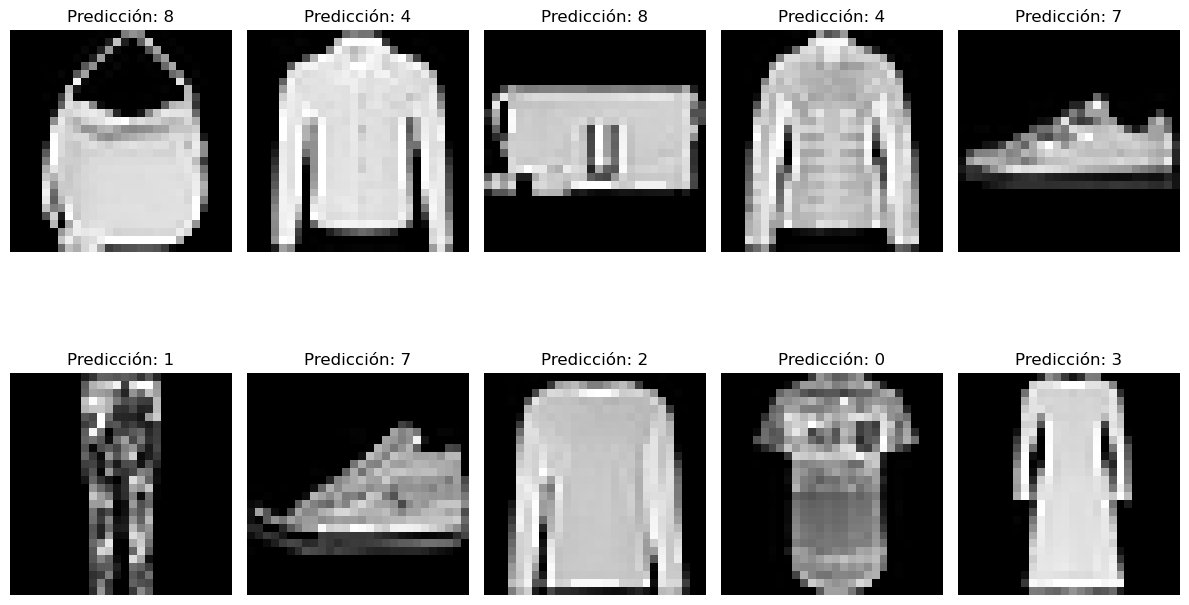

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener las predicciones del modelo sobre los datos de prueba
predicciones = modelo.predict(x_prueba)

# Seleccionar aleatoriamente algunas imágenes y sus predicciones
num_imagenes = 10
indices_aleatorios = np.random.choice(range(len(x_prueba)), num_imagenes, replace=False)

# Mostrar las imágenes y las predicciones correspondientes
plt.figure(figsize=(12, 8))
for i, idx in enumerate(indices_aleatorios):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_prueba[idx].reshape(28, 28), cmap='gray')
    plt.title("Predicción: {}".format(np.argmax(predicciones[idx])))
    plt.axis('off')
plt.tight_layout()
plt.show()

313/313 [==============================] - 2s 7ms/step


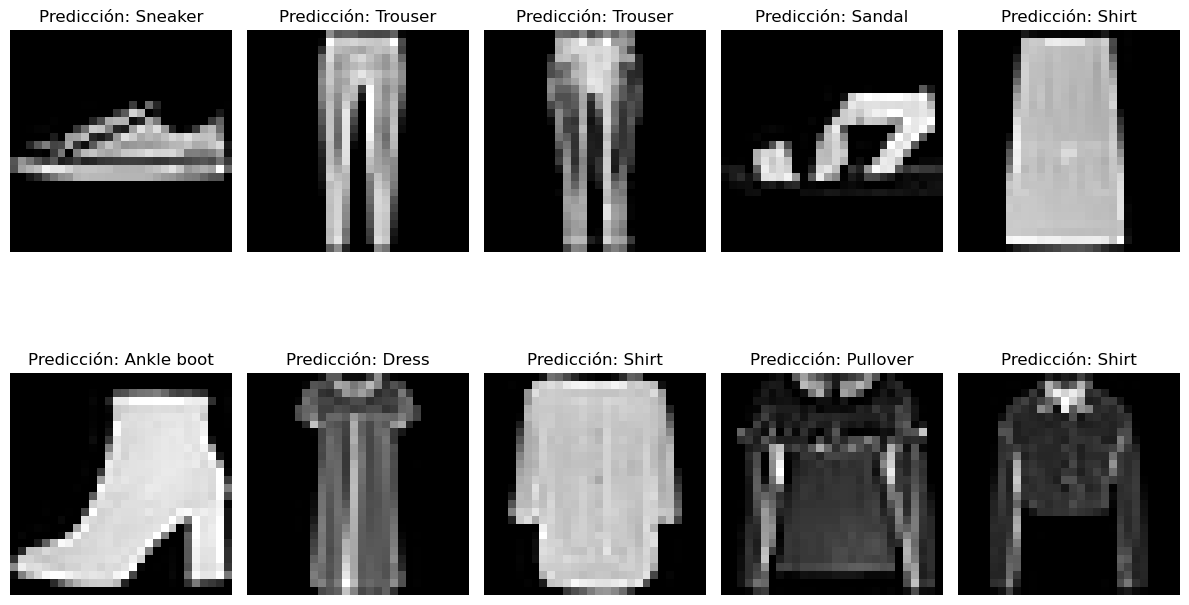

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de las clases para MNIST
nombres_clases = ['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Obtener las predicciones del modelo sobre los datos de prueba
predicciones = modelo.predict(x_prueba)

# Seleccionar aleatoriamente algunas imágenes y sus predicciones
num_imagenes = 10
indices_aleatorios = np.random.choice(range(len(x_prueba)), num_imagenes, replace=False)

# Mostrar las imágenes y las predicciones correspondientes con los nombres de las clases
plt.figure(figsize=(12, 8))
for i, idx in enumerate(indices_aleatorios):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_prueba[idx].reshape(28, 28), cmap='gray')
    clase_predicha = np.argmax(predicciones[idx])
    nombre_clase_predicha = nombres_clases[clase_predicha]
    plt.title("Predicción: {}".format(nombre_clase_predicha))
    plt.axis('off')
plt.tight_layout()
plt.show()

## Conclusiones

La diferencia principal entre una red convolucional (CNN) con funciones de activación ReLU y tanh radica en cómo estas funciones transforman las entradas de la red.

**ReLU (Rectified Linear Unit):**

**-** ReLU es una función de activación no lineal que devuelve 0 para entradas negativas y la entrada misma para valores positivos.

**-** ReLU es conocida por ser más rápida de calcular y evita el problema de la desaparición del gradiente en comparación con funciones de activación como la sigmoide y la tangente hiperbólica.

**-** Al permitir el paso de gradientes positivos sin truncarlos, ReLU puede ayudar a acelerar el proceso de entrenamiento y prevenir el sobreajuste.

**-** A la hora de entrenar con esta función encontramos  en el mommento del entrenamiento los valores de accuracy: 0.9181 - loss: 0.2229

**tanh (Tangente Hiperbólica):**

**-** La función tanh es una función de activación que comprime sus entradas en el rango [-1, 1].
 .
**-** A diferencia de ReLU, tanh es simétrica alrededor del origen, lo que significa que puede producir valores negativos y positivos.

**-** A función tanh es útil en ciertos escenarios donde se desean salidas normalizadas en el rango [-1, 1], como en algunos tipos de redes neuronales recurrentes (RNNs) o en la capa de salida de algunas arquitecturas de redes neuronales.

**-** A la hora de entrenar con esta función encontramos  en el mommento del entrenamiento los valores de accuracy: 0.9098 - loss: 0.2500 - val_accuracy: 0.8905 - val_loss: 0.3043

Por lo tanto podemos apreciar la red convolucionaes con la funcion de una funcion de activacion

En resumen, mientras que ReLU es comúnmente utilizada en CNNs debido a su eficiencia y capacidad para mitigar el problema del desvanecimiento del gradiente, tanh puede ser útil en situaciones donde se necesitan salidas normalizadas en un rango específico. La elección entre estas funciones de activación depende de la naturaleza del problema y puede requerir experimentación para determinar cuál funciona mejor en un contexto dado.

